# Problem statement:
Build a model that classifies tweets whether they are positive, negative or neutral sentiments.


# Metric of sucess
Build a model with above 80% accuracy that can classify tweets into negative, positive and neutral sentiments.

#Understanding the Context
Moringa school wants to improve the interaction experience with their users on Twitter. Optimising on twitter interaction is important because  users can be, consumers, potential consumers,business parters or potential business parters. By classifying the tweets we can help the relevant department addressing emerging and pressing issues affecting the users


#Experimental Design
> 
1. Scraping for tweets from twitter
2. Basic clean( removing puctuations, username, hashtags, url links)
3. labeling of tweets
4. Undertaking Exploratory data analysis
5. Sentimentetting up parameters for the neural network
6. Build a baseline model.
7. Improve the model, applying transfer learning.


#Data relevance

The relavance of our data will be answered by the following questions.

* How accurate is the data?
* Was the dataset sufficient?
* Was the data biased?
* Is the data source a reliable source?

#Tweets mining

## Importing the dependables




In [0]:
#Importing Libariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import tweepy
import re

In [0]:
# pip install tweepy

In [0]:
consumer_key = "bFZAKkBqH1fxJukwjZB1hokwv"
consumer_secret = "Momkx7aCKDRqq37NjyrKWpiG31sviKUWvsQnZxAAlN8gmWU6ds"
access_token = "818900839901331456-kWZlALIJ5jS6AGEdiHKHRDXqMmDtikc"
access_token_secret = "Pfq0IrrRCke9zc5teAc4I72gyIqfcXVimLciGViPsUbaR"

In [0]:
import tweepy as tw
import pandas as pd

In [0]:
#getting authorizations
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="@imbankke", count = 10000, lang ="en", include_rts=False,tweet_mode="extended")

In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.shape

(200, 1)

In [8]:
df.head(10)

,Tweets
0,"May this Ramadhan bring you prosperity, wealth..."
1,Pay for deliveries via mobile money through I&...
2,@homekyle Thank you. ^JL
3,@homekyle Dm us you contact details. ^JL
4,"@homekyle ,Hello kindly share with us a contac..."
5,"@ChaoticKitt_n For account closure, you will n..."
6,Did you know that exercising daily can help yo...
7,"@ChaoticKitt_n Hello Kori, we are currently ex..."
8,@CleoAngieM We have responded to your DM. Than...
9,@Hrhmakanda You are most welcome. ^AB


In [9]:
df.Tweets[1]

'Pay for deliveries via mobile money through I&amp;M Mobile App. Avoid Cash transactions. Twende Digital with I&amp;M Bank. \n#KomeshaCorona #IMCares #WeAreOnYourSide https://t.co/I1oTNYLY5p'

# Viewing the data

In [10]:
# previewing the top of the data se
df.head()

,Tweets
0,"May this Ramadhan bring you prosperity, wealth..."
1,Pay for deliveries via mobile money through I&...
2,@homekyle Thank you. ^JL
3,@homekyle Dm us you contact details. ^JL
4,"@homekyle ,Hello kindly share with us a contac..."


In [11]:
# previeing the bootom of the dataset
df.tail()

,Tweets
195,@mariamumoki @Cher0tich Good-morning^KK
196,@Patty2264 @ceo_imbankrw You're most welcome^KK
197,@MacpelLangat @NCBABankKenya Hi @MacpelLangat....
198,You don't need to physically visit a branch to...
199,The best way to prevent illness is to avoid be...


In [12]:
# getting the size of our dataset
df.shape

(200, 1)

there are 173 rows and 1 column

In [13]:
# getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


there are 173 objects in the dataset

# Data Cleaning

In [0]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


In [0]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [16]:
# showing cleaned tweets
df

,Tweets
0,"May this Ramadhan bring you prosperity, wealth..."
1,Pay for deliveries via mobile money through I&...
2,Thank you. ^JL
3,Dm us you contact details. ^JL
4,",Hello kindly share with us a contact number ..."
...,...
195,Good-morning^KK
196,2264 _imbankrw You're most welcome^KK
197,Hi . Please DM us your issue for assistance.^DK
198,You don't need to physically visit a branch to...


# Univariate Analysis

I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).

In [0]:
from textblob import TextBlob


In [18]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"May this Ramadhan bring you prosperity, wealth...",0.200000,0.700
1,Pay for deliveries via mobile money through I&...,0.000000,0.000
2,Thank you. ^JL,0.000000,0.000
3,Dm us you contact details. ^JL,0.000000,0.000
4,",Hello kindly share with us a contact number ...",0.900000,0.600
...,...,...,...
195,Good-morning^KK,0.000000,0.000
196,2264 _imbankrw You're most welcome^KK,0.500000,0.500
197,Hi . Please DM us your issue for assistance.^DK,0.000000,0.000
198,You don't need to physically visit a branch to...,0.368571,0.345


Let’s see how well the sentiments are distributed. A good way to accomplish this task is by understanding the common words by plotting word clouds.
*********
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
**********
Let’s visualize all the words in the data using the word-cloud plot. 

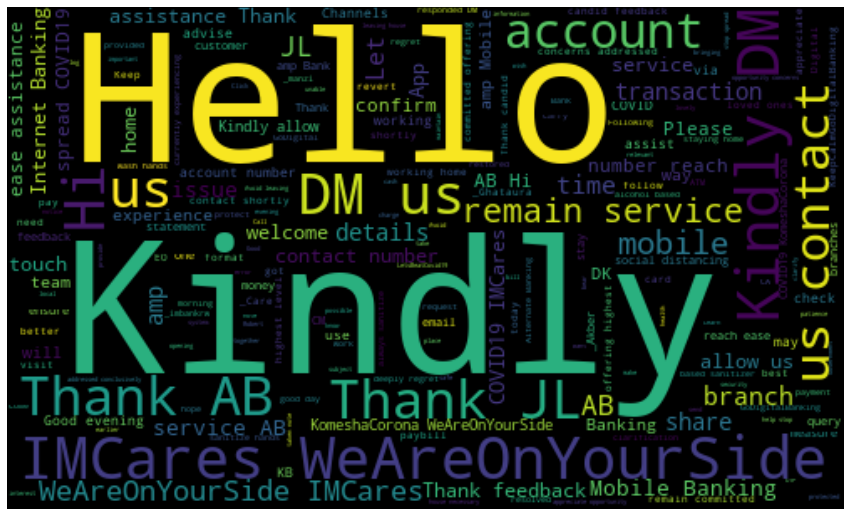

In [19]:
from wordcloud import WordCloud
# word cloud visualization
plt.figure(figsize=(15, 20))
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.

In [20]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"May this Ramadhan bring you prosperity, wealth...",0.200000,0.700,Positive
1,Pay for deliveries via mobile money through I&...,0.000000,0.000,Neutral
2,Thank you. ^JL,0.000000,0.000,Neutral
3,Dm us you contact details. ^JL,0.000000,0.000,Neutral
4,",Hello kindly share with us a contact number ...",0.900000,0.600,Positive
...,...,...,...,...
195,Good-morning^KK,0.000000,0.000,Neutral
196,2264 _imbankrw You're most welcome^KK,0.500000,0.500,Positive
197,Hi . Please DM us your issue for assistance.^DK,0.000000,0.000,Neutral
198,You don't need to physically visit a branch to...,0.368571,0.345,Positive


Print the positive tweets in ascending order. The most positive tweet is the #1 tweet.

In [21]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) May this Ramadhan bring you prosperity, wealth, happiness and peace of mind. HappyRamadhanKareem2020 WeAreOnYourSide IMCares 

2)  ,Hello kindly share with us a contact number we can reach you on. Thank you. ^JL

3) Did you know that exercising daily can help you boost both your physical and mental health? As you StayHome  Incorporate exercises that best fit with your schedule IMCares WeAreOnYourSide StaySafe 

4) _n Hello Kori, we are currently experiencing a delay in OTP delivery. Kindly use the OTP that is sent via email. Thank you. ^AB

5)  You are most welcome. ^AB

6) Got questions about our products and services? We will be delighted to answer all your queries. Get in touch with us today via our  Call Center number:  020 3221000 or email: customercare.co.ke. IMCares WeAreOnYourSide 

7) At I&amp;M, when we are asked, are you maintaining social distance? Each one of us says ” I Am” and we ask are you?
COVID19 KomeshaCorona WeAreOnYourSide IMCares 

8

In [24]:
# Printing neutral tweets  
print('Printing neutral tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing neutral tweets:

1) Pay for deliveries via mobile money through I&amp;M Mobile App. Avoid Cash transactions. Twende Digital with I&amp;M Bank. 
KomeshaCorona IMCares WeAreOnYourSide 

2)  Thank you. ^JL

3)  Dm us you contact details. ^JL

4) _n For account closure, you will need to visit any of our nearest branches for assistance. Thank you. ^AB

5)  We have responded to your DM. Thank you. ^AB

6)  Hi ,
This is to confirm that you were contacted by our Lavington Mall Branch Team.^CM

7) 291920 We remain at your service. ^AB

8) 291920 Hello Steve, yes you can withdraw from any Visa or Kenswitch branded ATMs. Thank you. ^AB

9) Avoid leaving your house when it is not necessary. Let’s help stop the spread of COVID19 by staying at home. KomeshaCorona WeAreOnYourSide IMCares 

10)  We have taken note of the same and shared the feedback with our decision makers. We remain at your service. ^AB

11)  We remain at your service. ^AB

12)  Our mobile &amp; Internet Banking services ha

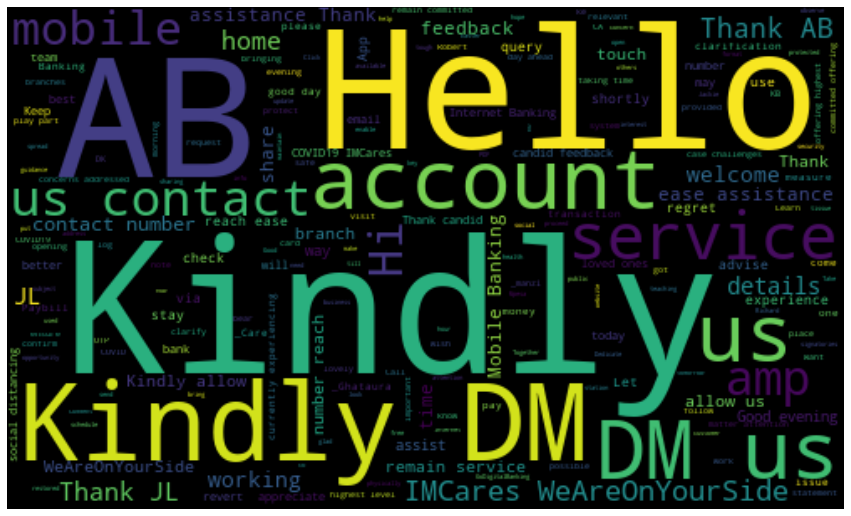

In [47]:
plt.figure(figsize=(15, 20))
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
p_tweets = ' '.join([twts for twts in ptweets])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(p_tweets)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [25]:
# filtering out all the neutral words
df_neutral =  df['Analysis'] == 'Neutral'
df_neutral
neutral = df[df_neutral]
neutral.head()

,Tweets,Subjectivity,Polarity,Analysis
1,Pay for deliveries via mobile money through I&...,0.0,0.0,Neutral
2,Thank you. ^JL,0.0,0.0,Neutral
3,Dm us you contact details. ^JL,0.0,0.0,Neutral
5,"_n For account closure, you will need to visit...",0.0,0.0,Neutral
8,We have responded to your DM. Thank you. ^AB,0.0,0.0,Neutral


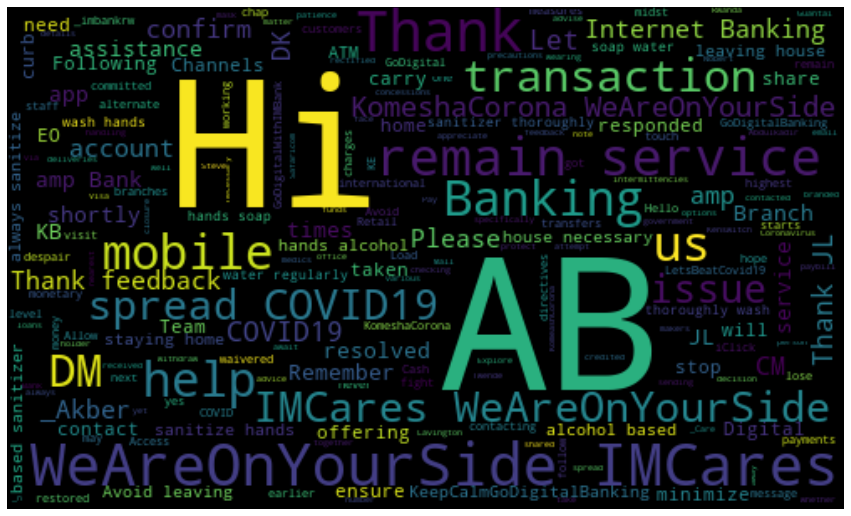

In [26]:
# word cloud visualization
plt.figure(figsize=(15, 20))
allWords = ' '.join([twts for twts in neutral['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Print the negative tweets in descending order. The most negative tweet is the #1 tweet.

In [27]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  We confirm that currently we are unable to provide statements in a machine readable format. We have taken note of your feedback and are exploring the option of availing statements in XML or any other format that our customer prefers provided it meets our security requirements.^AB

2) I&amp;M Cards are designed to facilitate the process by which you make payment for your everyday expenditures. Let’s GoCashless  
GoDigital IMCares WeAreOnYourSide KomeshaCorona 

3)  Hi, unfortunately we are unable to send the statements in any other format. ^BY

4)  Hello  we deeply regret the unpleasant experience, we would appreciate an opportunity to have your concerns addressed conclusively. Kindly dm us a mobile number we can reach you on. Thank you ^JL

5) Are you playing your part? We request all customers to wear a mask and maintain social distancing when visiting our branches and ATMs to reduce the risk of contracting or spreading COVID-19.  What do you think is wr

In [28]:
#filtering all the negative words
df_negative =  df['Analysis'] == 'Negative'
df_negative
negative = df[df_negative]
negative.head()

,Tweets,Subjectivity,Polarity,Analysis
26,We confirm that currently we are unable to pr...,0.425000,-0.208333,Negative
34,I&amp;M Cards are designed to facilitate the p...,0.600000,-0.200000,Negative
46,"Hi, unfortunately we are unable to send the s...",0.625000,-0.375000,Negative
55,Hello we deeply regret the unpleasant experi...,0.750000,-0.016667,Negative
70,Are you playing your part? We request all cust...,0.483333,-0.233333,Negative


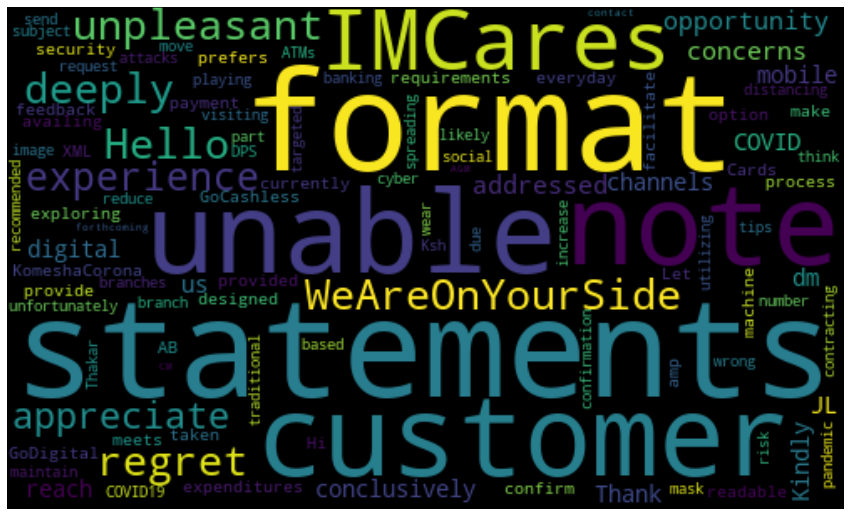

In [29]:
# word cloud visualization
plt.figure(figsize=(15, 20))
allWords = ' '.join([twts for twts in negative['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [30]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

57.5

there are 57.7% positive tweets

In [31]:
# Print the percentage of neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']
ntweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

57.5

there are 57.7% neutral tweets

In [33]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

4.0

There are 4% of negative tweets

now, we are going to get the analysis of the sentiments

In [36]:
# Show the value counts
df['Analysis'].value_counts()

Positive    115
Neutral      77
Negative      8
Name: Analysis, dtype: int64

there are 121 positive tweets, 43 neutral tweets and 9 negative tweets

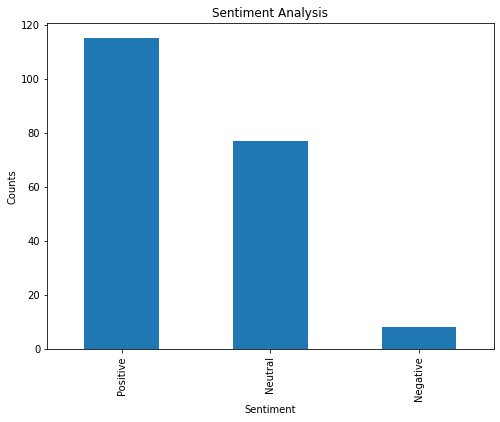

In [37]:
# Plotting and visualizing the counts
plt.figure(figsize=(8,6)) 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

here is the visualisation of the above findings

# Bivariate Analysis

Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

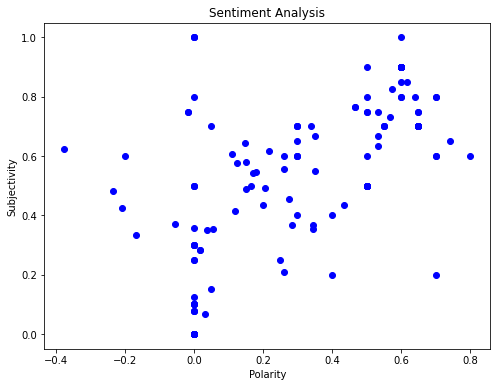

In [38]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

#BASE LINE MODEL: NAIVE BAYES

In [0]:
# data preparation
x = df[["Subjectivity","Polarity"]]
y = df["Analysis"]

In [0]:
# spliting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [43]:
# Predicting our test predictors
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))


0.975


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.975


97.5% Accuracy score


In [45]:
print(confusion_matrix(y_test, y_pred))

[[ 2  0  1]
 [ 0 16  0]
 [ 0  0 21]]


the are 2, 16 and 21 correct predictions from positive, neutral and negative analysis respectively

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.67      0.80         3
     Neutral       1.00      1.00      1.00        16
    Positive       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.89      0.93        40
weighted avg       0.98      0.97      0.97        40



the F1 score is 97%

#Observations

* Moringa received more positive than negative feedback 

#Limitations

* It took a long time to source the data
* Sentimetal polarity score does not understand Swahili words and some informal languages
* lack for sufficent tweeets


#Recommendations

* more analysis should be undertaken to find out the reason behind the negative tweets
* source for more data by exploring institutions that largely depend on customer feedback for instance, telecoms and banks
* Explore other tools for sentiment scoring